In [1]:
%pylab
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.colors as color
import nugridpy.utils as utils
import sys
import time

# use my branch of PyPPM
sys.path.insert(0,'/user/david/PyPPM/')
from ppmpy import ppm
cb = utils.linestylecb

Using matplotlib backend: nbAgg
Populating the interactive namespace from numpy and matplotlib


## Reading In MomsData

In [2]:
# Path where momsdata is located (cedar is faster)
moms_path_768 = '/user/cedar_scratch_djstephe/moms-demo/M29-768/myavsbq'
moms_path_1536 = '/user/cedar_scratch_djstephe/moms-demo/M35-1536/myavsbq'

# we are working with one dump, choose it to be read in first
dump768 = 650

# we can time this 768
start_time = time.time()
momsdataset768 = ppm.MomsDataSet(moms_path_768,dump768)
print('To read in a moms datacube, '+str(int(768/4.))+'^3 it took {:4.2f} seconds'.format(time.time() - start_time))

print('')

# we are working with one dump, choose it to be read in first
dump1536 = 375

# # we can time this 1536
start_time = time.time()
momsdataset1536 = ppm.MomsDataSet(moms_path_1536,dump1536)
print('To read in a moms datacube, '+str(int(1536/4.))+'^3 it took {:4.2f} seconds'.format(time.time() - start_time))

51 .aaa files found in '/user/cedar_scratch_djstephe/moms-demo/M29-768/myavsbq/.
Dump numbers range from 650 to 700.
The PPMstar grid is being constructed, this can take a moment
To read in a moms datacube, 192^3 it took 2.10 seconds

51 .aaa files found in '/user/cedar_scratch_djstephe/moms-demo/M35-1536/myavsbq/.
Dump numbers range from 375 to 425.
The PPMstar grid is being constructed, this can take a moment
To read in a moms datacube, 384^3 it took 14.81 seconds


Grab the radial profiles of the run

In [3]:
# grab rprofs
rprof_dir768 = '/user/cedar_scratch_djstephe/moms-demo/M29-768/rprofs'
rprof768 = ppm.RprofSet(rprof_dir768)

rprof_dir1536 = '/user/cedar_scratch_djstephe/moms-demo/M35-1536/rprofs'
rprof1536 = ppm.RprofSet(rprof_dir1536)

51 rprof files found in '/user/cedar_scratch_djstephe/moms-demo/M29-768/rprofs/.
Dump numbers range from 650 to 700.
Reading history file '/user/cedar_scratch_djstephe/moms-demo/M29-768/rprofs/HcoreE00768-0000.hstry'.
51 rprof files found in '/user/cedar_scratch_djstephe/moms-demo/M35-1536/rprofs/.
Dump numbers range from 375 to 425.
Reading history file '/user/cedar_scratch_djstephe/moms-demo/M35-1536/rprofs/HcoreE01536-0000.hstry'.


## Temporal and Spatial Resolution

In [4]:
# spatial resolution for 768 momsdata
print('The spatial resolution of 768 momsdata is {:0.3f}'.format(np.diff(momsdataset768.get_grid()[0])[0]),'Mm')
print('While PPMStar 768 has a spatial resolution of {:0.3f}'.format(np.diff(momsdataset768.get_grid()[0])[0]/4.),'Mm')

print('')

# spatial resolution for 1536 momsdata
print('The spatial resolution of 1536 momsdata is {:0.3f}'.format(np.diff(momsdataset1536.get_grid()[0])[0]),'Mm')
print('While PPMStar 1536 has a spatial resolution of {:0.3f}'.format(np.diff(momsdataset1536.get_grid()[0])[0]/4.),'Mm')

print('')

# what is the extent of the simulation?
print('The extent of the simulation is then {:0.0f}'.format(np.diff(momsdataset1536.get_grid()[0])[0]/4. * 1536/2.),'Mm')

The spatial resolution of 768 momsdata is 26.042 Mm
While PPMStar 768 has a spatial resolution of 6.510 Mm

The spatial resolution of 1536 momsdata is 13.021 Mm
While PPMStar 1536 has a spatial resolution of 3.255 Mm

The extent of the simulation is then 2500 Mm


In [5]:
# temporal resolution for 768 momsdata
print('The temporal resolution of 768 and 1536 momsdata is the same as the PPMStar output which averages around {:0.2f}'.
      format(np.mean(np.diff(rprof1536.get_history().get('time(mins)')))),'minutes per dump')

print('')

print('The run-time temporal resolution of the PPMStar output averages around {:0.2f}'.
      format(np.mean(rprof1536.get_history().get('dt(secs)'))),'seconds per cycle')

The temporal resolution of 768 and 1536 momsdata is the same as the PPMStar output which averages around 167.28 minutes per dump

The run-time temporal resolution of the PPMStar output averages around 2.73 seconds per cycle


## Find Times For Dumps

As hinted at in the above section, there is a history file that gives us information about the run. This is located in the rprof files themselves

In [6]:
# get the simulation time in seconds for dump 100 in the 768 and 1536 runs
print('{:0.1f} seconds '.format(rprof768.get_history().get('time(secs)')[dump768]) + 
'have passed since the simulation started for the 768 run')
print('{:0.1f} seconds '.format(rprof1536.get_history().get('time(secs)')[dump1536]) +
      'have passed since the simulation started for the 1536 run')

6507520.0 seconds have passed since the simulation started for the 768 run
3756320.0 seconds have passed since the simulation started for the 1536 run


## What Quantities Have What index?

The following quantities written into the moms data file which can be called with an index:

| index | quantity            |
|:-----:|:--------------:     |
| 0     | x                   |
| 1     | $\vec{u_{x}}$                  |   
| 2     | $\vec{u_{y}}$             | 
|  3    | $\vec{u_{z}}$             | 
|  4    | $\lvert\vec{u_{t}}\rvert$         | 
|  5    | $\lvert\vec{u_{r}}\rvert$             | 
|  6    | $\lvert\vec{\omega}\rvert$      | 
|  7    | P              | 
|  8    | rho            | 
|  9    | fv             | 

#### Some Helpful Definitions

$\mu$ = fv $\times$ 0.617 + (1 - fv) $\times$ 0.669

T = $\frac{P \mu}{\rho R_{gas}}$

$R_{gas}$ = 8.314462

$\vec{\omega}$ = $\vec{\nabla} \times \vec{u}$

## Make Rprofs and Plot

In [7]:
ifig = 0

#### 768

In [8]:
# get T9 and Ut
P_rprof = rprof768.get('P0',fname=dump768,resolution='h')[0::2] + rprof768.get('P1',fname=dump768,resolution='h')[0::2]
rho_rprof = rprof768.get('Rho0',fname=dump768,resolution='h')[0::2] + rprof768.get('Rho1',fname=dump768,resolution='h')[0::2]
FV_rprof = rprof768.get('FV',fname=dump768,resolution='h')[0::2]
T9_rprof = P_rprof * (0.617*FV_rprof + 0.669*(1-FV_rprof)) / (8.314462 * rho_rprof)
R_rprof = rprof768.get('R',fname=dump768,resolution='l')
Ut_rprof = rprof768.get('|Ut|',fname=dump768)

In [9]:
# make an rprof of temperature and ut
ut_avg, radial_axis = momsdataset768.get_rprof(4,dump768)

# first we need to construct T from quantities
mu = 0.617 * momsdataset768.get(9,fname=dump768) + (1 - momsdataset768.get(9,fname=dump768))*0.669
P = momsdataset768.get(7,fname=dump768)
rho = momsdataset768.get(8,fname=dump768)
Rgas = 8.314462

# put it all together
T = (mu * P) / (Rgas * rho)

# we can give the rprof method an array to be spherically averaged
T_avg, radial_axis = momsdataset768.get_rprof(T,dump768)

<IPython.core.display.Javascript object>


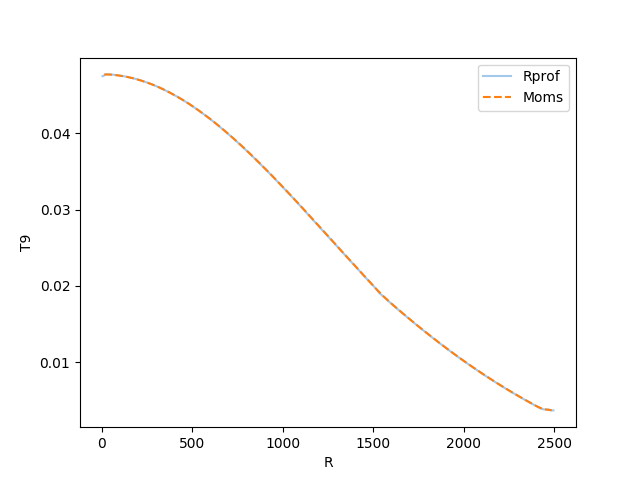

In [10]:
# plot
plt.close(ifig); ifig += 1; plt.figure(ifig)

plt.plot(R_rprof,T9_rprof,label='Rprof',ls=cb(0)[0],color=cb(0)[2])
plt.plot(radial_axis,T_avg,label='Moms',ls=cb(1)[0],color=cb(1)[2])
plt.xlabel('R')
plt.ylabel('T9')

plt.legend()

<IPython.core.display.Javascript object>


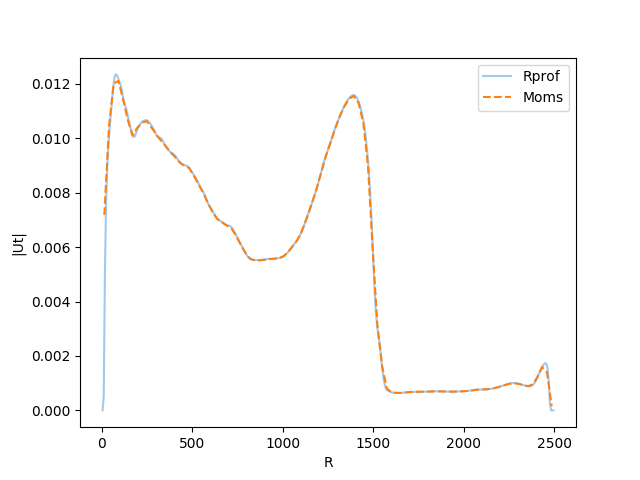

In [11]:
# plot
plt.close(ifig); ifig += 1; plt.figure(ifig)

plt.plot(R_rprof,Ut_rprof,label='Rprof',ls=cb(0)[0],color=cb(0)[2])
plt.plot(radial_axis,ut_avg,label='Moms',ls=cb(1)[0],color=cb(1)[2])

plt.xlabel('R')
plt.ylabel('|Ut|')

plt.legend()

#### 1536

In [15]:
# get T9 and Ut
P_rprof = rprof1536.get('P0',fname=dump1536,resolution='h')[0::2] + rprof1536.get('P1',fname=dump1536,resolution='h')[0::2]
rho_rprof = rprof1536.get('Rho0',fname=dump1536,resolution='h')[0::2] + rprof1536.get('Rho1',fname=dump1536,resolution='h')[0::2]
FV_rprof = rprof1536.get('FV',fname=dump1536,resolution='h')[0::2]

# T9 in rprof class is not correct, calculate directly
T9_rprof = P_rprof * (0.617*FV_rprof + 0.669*(1-FV_rprof)) / (Rgas * rho_rprof)


R_rprof = rprof1536.get('R',fname=dump1536,resolution='l')
Ut_rprof = rprof1536.get('|Ut|',fname=dump1536)

In [16]:
# make an rprof of temperature and ut
ut_avg, radial_axis = momsdataset1536.get_rprof(4,dump1536)

# first we need to construct T from quantities
mu = 0.617 * momsdataset1536.get(9,fname=dump1536) + (1 - momsdataset1536.get(9,fname=dump1536))*0.669
P = momsdataset1536.get(7,fname=dump1536)
rho = momsdataset1536.get(8,fname=dump1536)

# put it all together
T = (mu * P) / (Rgas * rho)

# we can give the rprof method an array to be spherically averaged
T_avg, radial_axis = momsdataset1536.get_rprof(T,dump1536)

<IPython.core.display.Javascript object>


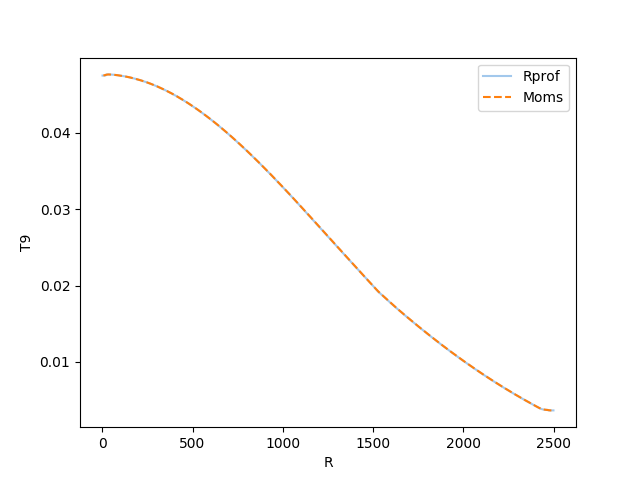

In [17]:
# plot
plt.close(ifig); ifig += 1; plt.figure(ifig)

plt.plot(R_rprof,T9_rprof,label='Rprof',ls=cb(0)[0],color=cb(0)[2])
plt.plot(radial_axis,T_avg,label='Moms',ls=cb(1)[0],color=cb(1)[2])

plt.xlabel('R')
plt.ylabel('T9')

plt.legend()

<IPython.core.display.Javascript object>


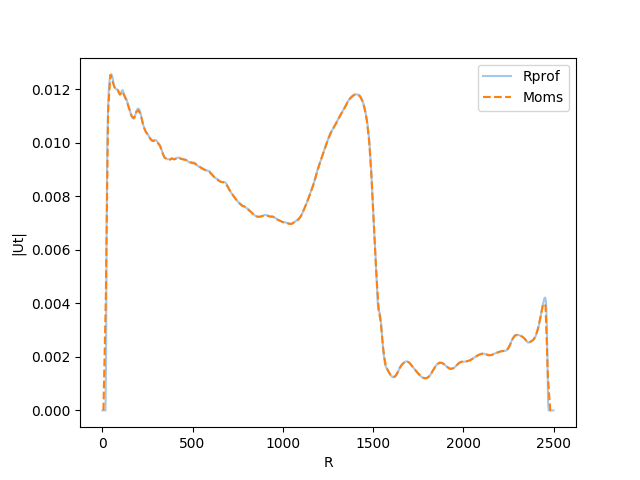

In [18]:
# plot
plt.close(ifig); ifig += 1; plt.figure(ifig)

plt.plot(R_rprof,Ut_rprof,label='Rprof',ls=cb(0)[0],color=cb(0)[2])
plt.plot(radial_axis,ut_avg,label='Moms',ls=cb(1)[0],color=cb(1)[2])

plt.xlabel('R')
plt.ylabel('|Ut|')

plt.legend()

## Make A Planar Slice Image

In [19]:
# grab the grid
x,y,z,r = momsdataset1536.get_grid()

# they are flattened arrays, rearrange
resolution = momsdataset1536.momsdata.resolution
r_matrix = np.reshape(r,(resolution,resolution,resolution))

# extent x,y
extent=[min(x),max(x),min(y),max(y)]

# slice number
slice_num = 200

#### Radius

<IPython.core.display.Javascript object>


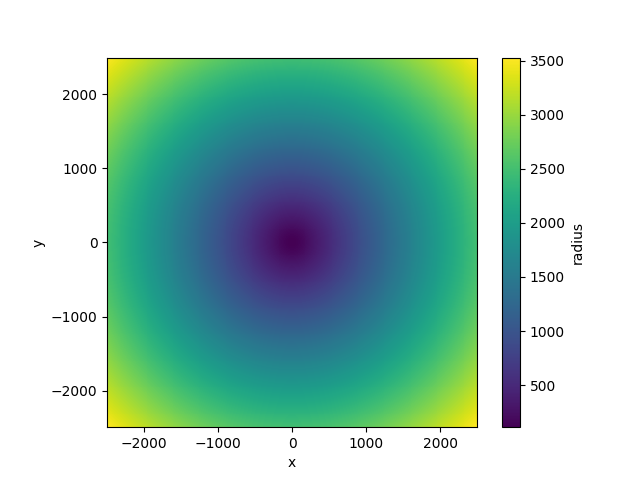

In [35]:
plt.close(ifig); ifig += 1; plt.figure(ifig)
plt.imshow(r_matrix[:][:][slice_num],extent=extent)
plt.ylabel('y')
plt.xlabel('x')
cbar = plt.colorbar()

# label colorbar
cbar.ax.set_ylabel('radius')

#### T9

In [21]:
T_matrix = np.reshape(T,(resolution,resolution,resolution))

<IPython.core.display.Javascript object>


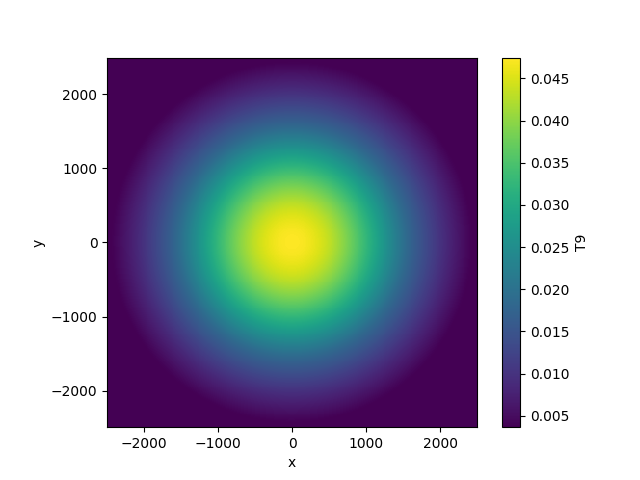

In [25]:
plt.close(ifig); ifig += 1; plt.figure(ifig)
plt.imshow(T_matrix[:][:][slice_num],extent=extent)
plt.ylabel('y')
plt.xlabel('x')
cbar = plt.colorbar()

# label colorbar
cbar.ax.set_ylabel('T9')

#### |Ut|

In [24]:
ut_matrix = np.reshape(momsdataset1536.get(4,dump1536),(resolution,resolution,resolution))

<IPython.core.display.Javascript object>


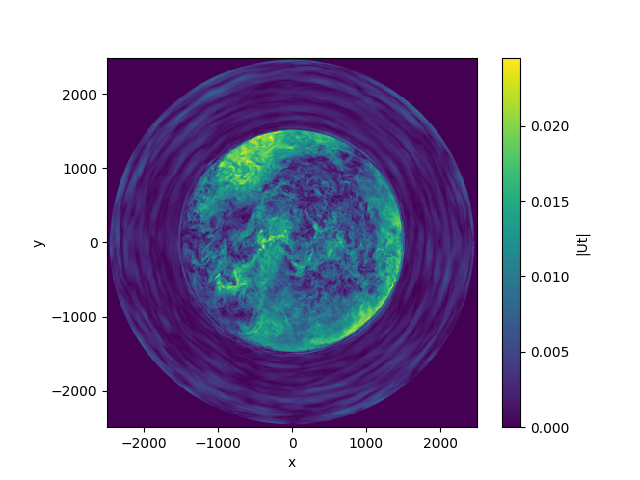

In [26]:
plt.close(ifig); ifig += 1; plt.figure(ifig)
plt.imshow(ut_matrix[:][:][slice_num],extent=extent)
plt.ylabel('y')
plt.xlabel('x')
cbar = plt.colorbar()

# label colorbar
cbar.ax.set_ylabel('|Ut|')

## FV Colourmap of a Plane (x=y=0)

In [28]:
# x=y=0, a particular z slice. convert to an 8-bit number
fv = np.reshape(momsdataset768.get(9,dump768),(192,192,192))
fv_bit = 251 + 13.35455532 * np.log(fv[:][:][96])

In [29]:
FV_cmap_str = '''
Anot: 0 0.0       
Anot: 18 0.1058824
Anot: 56 0.2745098
Anot: 75 0.7843137
Anot: 123 1.0 
Anot: 158 1.0
Anot: 184 0.5490196
Anot: 203 0.454902
Anot: 255 0.1254902
Cnot: 0 0.0 0.0 0.0           
Cnot: 48 0.0 0.0 0.2509804    
Cnot: 56 0.0 0.2352941 0.627451
Cnot: 65 0.0 0.7843137 1.0   
Cnot: 75 1.0 1.0 1.0         
Cnot: 100 1.0 1.0 0.0         
Cnot: 186 1.0 0.0 0.0        
Cnot: 244 0.5019608 0.0 0.0   
Cnot: 255 0.5019608 0.0 0.0   
'''
cmap = ppm.colourmap_from_str(FV_cmap_str, segment=(5, 251))

# normalize to our 255 bit range
norm = mpl.colors.Normalize(vmin=5, vmax=251)

#### Square Image

<IPython.core.display.Javascript object>


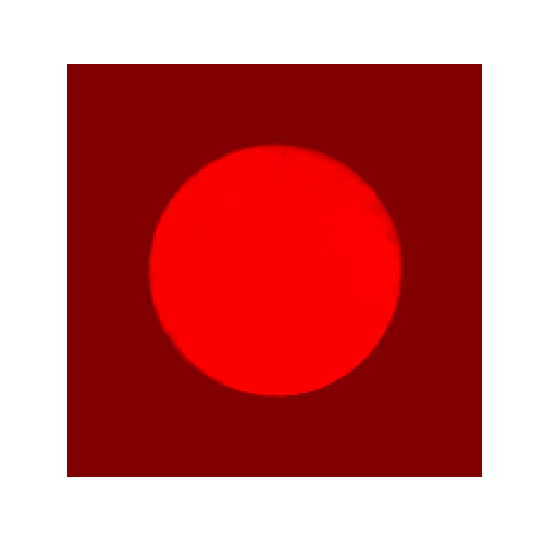

(-2486.97900390625, 2486.979248046875, -2486.97900390625, 2486.979248046875)

In [34]:
my_dpi = 300
plt.close(ifig); ifig+=1; plt.figure(ifig,figsize=(536/my_dpi, 536/my_dpi), dpi=my_dpi)
x768,y768,z768,r768 = momsdataset768.get_grid()
plt.pcolor(np.unique(x768),np.unique(y768),fv_bit,cmap=cmap,norm=norm)

plt.axis('off')